**[Voltar para a Página Inicial do Curso](https://www.kaggle.com/c/ml-em-python)**

# **Clusterização**
A clusterização ou agrupamento é uma técnica de aprendizado de máquina **não-supervisionada**. Na criação do modelo de clusterização não usamos a target, por isso é chamado de não-supervisionado. Também não fazemos a separação do dataset entre treino e teste. Usamos todos os dados, sem fazer divisões das linhas dos dados. No aprendizado não-supervisionado, chamamos as colunas do dataset de **dimensões** e não mais de atributos ou variáveis. Por exemplo, no dataset de Flores (iris dataset) temos 4 dimensões: altura da pétala, largura da pétala, altura da sépala e largura da sépala. 

![](https://blog.bismart.com/hs-fs/hubfs/Imported_Blog_Media/ClassificationAndClustering/Clustering&clasification-Animales.gif?width=900&name=Clustering&clasification-Animales.gif)

Com várias imagens não rotuladas, poderíamos usar clusterização para agrupar as imagens por semelhança. Inclusive seria possível identificar as anomalias, ou seja, aqueles casos que são diferentes de todos os demais.
![](https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/face-clustering/face_clustering_animation.gif)

A Clusterização pode ser usada tanto na preparação de dados para descobrir padrões ainda desconhecidos quanto para a criação de modelos com o objetivo de criar grupos, separando os dados em grupos ainda desconhecidos. A clusterização já é aplicada em diversos cenários, como no reconhecimento de padrões, análise de imagens, no agrupamento de espécies, na detecção de anomalias, na compressão de dados, no agrupamento de clientes, na classificação de documentos, no agrupamento de notícias.

### O resultado pode ser bem diferente do que você esperava. 
Sua intenção era em separar as imagens entre: imagens de cachorros x imagens de comida. Mas ao invés disso, os clusters foram criados de outra forma e o resultado foi este. 
![](https://www.vuzo.co.uk/wp-content/uploads/2018/10/Vuzo-Blog-chihuahuas-and-muffins.jpeg)
![](https://pbs.twimg.com/media/DXGH9PZX4AADYsS.jpg:large)
![](https://pbs.twimg.com/media/DCKduB-UMAAIRmX.jpg)
![](https://cookvids.co.uk/wp-content/uploads/2017/09/krosanai__700.jpg)
![](https://pbs.twimg.com/media/Cd3RI19WIAE5Dr9.jpg)
![](https://www.lifewithdogs.tv/wp-content/uploads/2016/03/3.11.16-Labradoodle-Fried-Chicken4.jpg)

**Conteúdo:**
1. O que é K-means?
2. Em mais detalhes: como calculamos a distância?
3. Como avaliar o modelo?
4. Como descobrir o número ideal de clusters?
5. Model Tuning
6. Exercício
7. Conclusão
8. Material Complementar

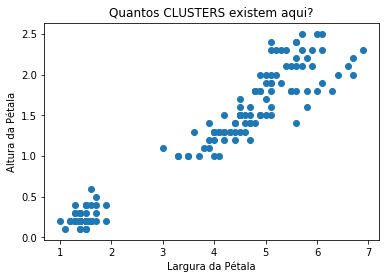

In [2]:
# Visualiza o scatterplot de duas dimensões
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.iris import flowers as floresdf
import warnings
warnings.filterwarnings("ignore")

# Quantos grupos existem nos dados
plt.scatter(x=floresdf.petal_length, y=floresdf.petal_width)
plt.xlabel('Largura da Pétala')
plt.ylabel('Altura da Pétala')
plt.title('Quantos CLUSTERS existem aqui?')
plt.show()

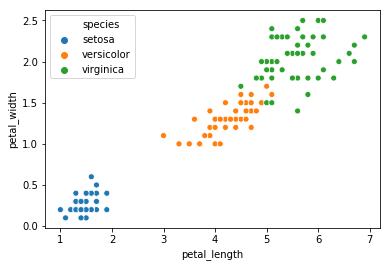

In [3]:
# Faz o gráfico 
sns.scatterplot(x=floresdf.petal_length, y=floresdf.petal_width, hue=floresdf.species)
plt.show()

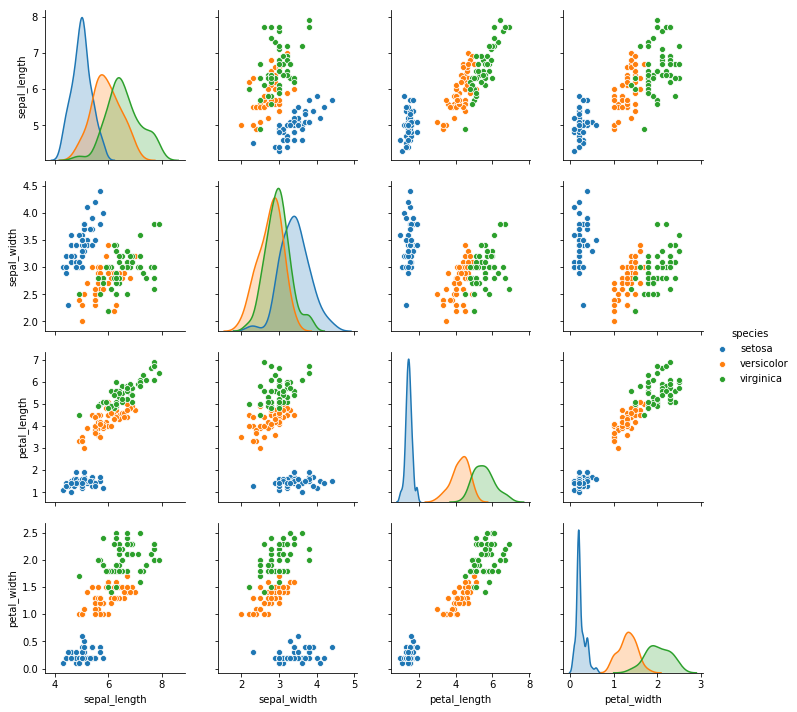

In [4]:
# Visualiza em Matriz
sns.pairplot(floresdf, hue="species")
plt.show()

# O que é K-MEANS?
Para a clusterização, existem vários algoritmos. O mais utilizado é o K-means. O K-means costuma ser mais aplicado em dados com poucas dimensões de dados numéricos e continuos para organizar os dados em grupos categóricos. O **K-Means** tem o objetivo de dividir as observações em k clusters. K é o número de clusters. Esta divisão dos dados entre os clusters tem que ser de forma que os diferentes clusters fiquem mais separados entre eles, enquanto que as observações dentro de cada cluster fiquem mais próximas entre elas. Para isso, é utilizada a soma dos erros quadrados ou Sum of Squared Errors (SSE) que busca minimizar a distância entre os pontos e seu centroid. Depois que o modelo é criado, o K-means quando é aplicado lembra a média de cada cluster, também chamada de **centroids** e, com isso, encontra o centroid mais próximo a cada novo dado. O centroid representa o centro do cluster.

![](https://www.saedsayad.com/images/Clustering_kmeans_c.png)

A clusterização com K-means compreende as seguintes etapas:
1. Inicialização: a localização dos centroids são geradas aleatoriamente
2. Designação: os K clusters são criados associando cada observação ao seu centroid mais próximo
3. Atualização: o centroid de cada cluster se torna a nova média do cluster
Este processo é repetido várias vezes até convergir. 

![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

In [7]:
flores = floresdf.iloc[:,2:4].values

In [8]:
# Importa a biblioteca kmeans
from sklearn.cluster import KMeans

# Se não colocarmos o número de clusters, o valor default de número de clusters é de 8 clusters.
modelokm = KMeans(n_clusters=3)

# Cria o modelo de clusterização para agrupar os dados de flores
modelokm = modelokm.fit(flores)

# Mostra quais são as coordenadas de cada centroid para cada dimensão. Temos 2 dimensões e 3 clusters.
modelokm.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [9]:
# Mostra a quantidade de clusters
modelokm.n_clusters

3

In [10]:
# Mostra as labels
labels = modelokm.labels_
labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [19]:
# Faz a clusterização dos dados usando o modelo criado
grupos = modelokm.predict(flores)

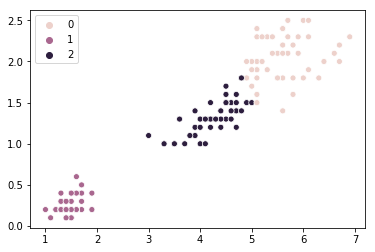

In [20]:
# Mostra o Gráfico de Clusters
sns.scatterplot(x=flores[:,0], y=flores[:,1], hue=labels)
plt.show()

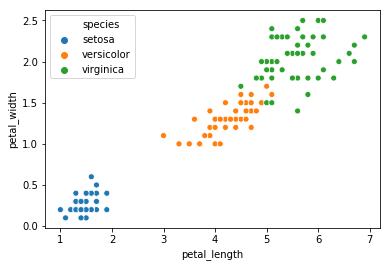

In [17]:
# Compara com o Gráfico anterior
sns.scatterplot(x=floresdf.petal_length, y=floresdf.petal_width, hue=floresdf.species)
plt.show()

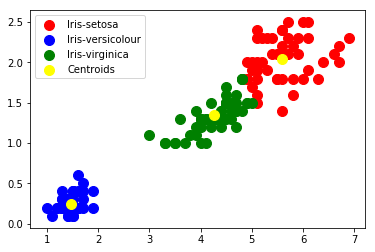

In [18]:
# Visualizar os clusters com os Centroids
plt.scatter(flores[grupos == 0, 0], flores[grupos == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(flores[grupos == 1, 0], flores[grupos == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(flores[grupos == 2, 0], flores[grupos == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(modelokm.cluster_centers_[:, 0], modelokm.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

# Em mais detalhes: Como calculamos a distância?
A similaridade é a métrica que mostra o quanto as observações de um mesmo grupo estão próximas entre si, ou seja, são mais similares entre si. Enquanto que ao mesmo tempo mostra o quanto as observações entre grupos diferentes estão mais distantes. 
![](https://chrisjmccormick.files.wordpress.com/2013/08/2d_euclidean_distance_illustration.png)
A Distância Euclidiana é usada para aproximar as observações ao centroid mais próximo. A distância entre o centroid e a observação é calculada com a distância euclidiana. Considere os pontos D1(2,0) e D2(1,3) e D4(2,2) .Teríamos:
![](https://sunainasblog.files.wordpress.com/2018/03/untitled1.png?w=620&h=210)

In [21]:
# Exemplo do cálculo da distancia euclidiana 
import math
d1 = (2, 0)
d2 = (1, 3)
distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(d1, d2)]))
print("Distância Euclidiana do Ponto D1 ao D2: ",distance)

Distância Euclidiana do Ponto D1 ao D2:  3.1622776601683795


# Como avaliar o modelo?
Para medir a qualidade do modelo de cluster. Usamos a **cross-tabulation** do pandas para comparar a clusterização com a classe de cada grupo.

In [22]:
# Cross-tabulation
import pandas as pd
df1 = pd.DataFrame({'labels':labels,"species":floresdf['species']})
ct1 = pd.crosstab(df1['labels'],df1['species'])
ct1

species,setosa,versicolor,virginica
labels,,,
0,0,2,46
1,50,0,0
2,0,48,4


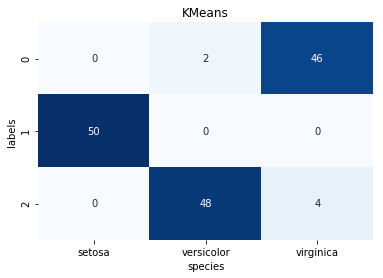

In [23]:
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

Para os datasets que não possuem labels, temos que usar outras formas, como usando a **Inertia**. A Inertia corresponde ao somatório dos erros quadráticos das instâncias de cada cluster. Assim:
* Mede o quanto os clusters estão separados entre eles
* Mede a distância de cada dado para o centroid do seu cluster
* Aplicamos `fit()` na `inertia_` em busca de minimizar a inertia na escolha dos clusters
* Quanto mais próximos entre si e do centroid, menor a inertia

In [24]:
print(modelokm.inertia_)

31.371358974358973


# Como descobrir o número ideal de clusters?
Um bom cluster tem uma baixa inertia_ (SSE) e também o menor número de clusters. Não queremos muitos clusters. A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. Este método testa a variância dos dados em relação ao número de clusters. O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. Chamamos de **curva de cotovelo**, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.

![](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

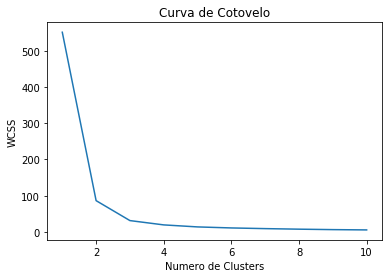

In [26]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(flores)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### Silhueta
A silhueta é uma medida do quanto observações mais similares estão próximas entre si e, ao mesmo tempo, o quanto estão distantes de outros clusters diferentes. Busca maior **coesão** dentro do cluster e maior **separação** entre clusters. A silhueta vai de -1 a 1, onde o maior valor indica que a observação se encaixou mais dentro do cluster e se distanciou dos outros clusters. Se a silhueta for negativa, a configuração do cluster pode ter ou clusters de mais ou clusters de menos. A silhueta também usa a distância euclidiana para medir a distância entre as observações.
![](http://www.mtechprojects.org/wp-content/uploads/2017/12/silhouette-coefficient.jpg)

Por exemplo:
![](https://www.researchgate.net/profile/Frans_Coenen/publication/221570710/figure/fig1/AS:670029003644935@1536758771429/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil.png)

In [31]:
# Silhueta
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(flores)
    score = silhouette_score(flores, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.7653904101258123
Silhueta para 3 clusters : 0.6604800083974887
Silhueta para 4 clusters : 0.6111992021278091
Silhueta para 5 clusters : 0.5883732712110276
Silhueta para 6 clusters : 0.5753448148375986
Silhueta para 7 clusters : 0.5586181431668088
Silhueta para 8 clusters : 0.5793586508481638
Silhueta para 9 clusters : 0.5828463340622911
Silhueta para 10 clusters : 0.43754514242972165


# Model Tuning
Não temos a garantia que os centroids serão iniciados de posições que levem ao melhor resultado. Podemos ter um resultado que convergiu, mas que não levou ao resultado ótimo porque os centroids do início que foram designados de forma randômica começaram de uma posição ruim. Para aliviar este problema, realizamos a execução do algoritmo várias vezes e isso é controlado pelo parâmetro `n_init`, que por default é 10. O que representa que o algoritmo K-means será iniciado 10 vezes com pontos de início diferentes. 

In [32]:
modelorm = KMeans(n_init=10)

---
# Exercício
Você consegue descobrir padrões em uma base de dados de clientes de supermercado para direcionar o marketing para determinados grupos de clientes, com base em seu perfil de compras?

In [66]:
# 1. Importa os dados de clientes do supermercado
mercadodf = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
# 2. Visualize o scatterplot em matriz com o hue = "Gender". Dá pra notar algum grupo?
sns.pairplot(mercadodf, hue="Gender")
plt.show()
# 3. Crie um DataFrame apenas com as colunas Annual Income e Spending Score
mercado = mercadodf.iloc[:,3:5].values
# 4. Importe o k-means
from sklearn.cluster import KMeans
# 5. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters
modelomercado = KMeans()
# 6. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(mercadokm)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
# 7. Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada
modelomercadonovo = KMeans(n_clusters=5)
modelomercadonovo = modelomercadonovo.fit(mercadokm)
# 8. Quais foram os centroids? Imprima os centroids
modelomercadonovo.cluster_centers_
labels = modelomercadonovo.labels_
labels 
grupos = modelomercadonovo.predict(mercadokm)
sns.scatterplot(x=mercado[:,0], y=mercado[:,1], hue=labels)
plt.show()
# 9. Mostra o gráfico do resultado com os centroids
plt.scatter(mercado[grupos == 0, 0], mercado[grupos == 0, 1], s = 100, c = 'red', label = 'Grupo 0')
plt.scatter(mercado[grupos == 1, 0], mercado[grupos == 1, 1], s = 100, c = 'blue', label = 'Grupo 1')
plt.scatter(mercado[grupos == 2, 0], mercado[grupos == 2, 1], s = 100, c = 'green', label = 'Grupo 2')
plt.scatter(mercado[grupos == 3, 0], mercado[grupos == 3, 1], s = 100, c = 'purple', label = 'Grupo 3')
plt.scatter(mercado[grupos == 4, 0], mercado[grupos == 4, 1], s = 100, c = 'magenta', label = 'Grupo 4')
plt.scatter(modelomercadonovo.cluster_centers_[:, 0], modelomercadonovo.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
# 10. Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a campanha de marketing?
mercadodf['grupos']=grupos


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),grupos
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


---
# Conclusão
Tem que se tomar cuidado ao usar clusterização com dados que não foram padronizados. Isto porque o K-means é muito sensível à escala dos dados porque utiliza a Distância Euclidiana para medir a distância. Por isso, sempre é importante aplicar o **Scaling** antes de usar o K-means. Outra desvantagem é que o K-Means pode ser bem **lento com grande número de observações**. Por isso, em alguns casos, utiliza-se uma amostra dos dados e não o conjunto inteiro por questões de performance. Clusterização pode ter resultado ruim se os dados tiverrem **ruídos** (overlapping) ou outliers. Um grande número de clusters (K) pode diminuir os erros, mas também pode ter maior risco de overfitting.

Como vantagem, a clusterização não precisa de dados previamente classificados. 

# Material Complementar
1. [K-means lecture by Andrew Ng](http://cs229.stanford.edu/notes/cs229-notes7a.pdf)
2. [Some Methods for Classification and Analysis of Mutivariate Observations. J. MacQueen,1967. pp.281-297](https://books.google.com.br/books?hl=pt-BR&lr=&id=IC4Ku_7dBFUC&oi=fnd&pg=PA281&dq=Some+methods+for+classification+and+analysis+of+multivariate+observations&ots=nOXjKWGcmO&sig=I9vBrrMQWVgLKYk577zS944OA1k)
3. [K-Means Clustering Algorithm](http://www.labri.fr/perso/bpinaud/userfiles/downloads/hartigan_1979_kmeans.pdf)
4. [K-Means ++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

## Resposta dos Exercícios

In [ ]:
# 1. Importa os dados de clientes do supermercado
import pandas as pd
perfil = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# 2. Visualize o scatterplot em matriz com o hue = "Gender". Dá pra notar algum grupo?
import seaborn as sns
sns.pairplot(perfil, hue="Gender")

In [ ]:
# 3. Crie um DataFrame apenas com as colunas Annual Income e Spending Score
perfil = pd.DataFrame(perfil, columns=["Annual Income (k$)", "Spending Score (1-100)"])

# 4. Importe o k-means
from sklearn.cluster import KMeans

# 5. Crie o modelo em cluster padrão, sem especificar a quantidade K de clusters
modelokm = KMeans()
modelokm = modelokm.fit(perfil)

In [ ]:
# 6. Crie uma curva de cotovelo. Qual seria o número ideal de clusters?
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(perfil)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 11), wcss)
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
# 7. Crie novamente o cluster com kmeans com a quantidade de n_clusters ajustada
modelokm = KMeans(n_clusters=5)
modelokm = modelokm.fit(perfil)
ymodelokm= modelokm.fit_predict(perfil)

# 8. Quais foram os centroids? Imprima os centroids
modelokm.cluster_centers_

In [ ]:
# 9. Mostra o gráfico do resultado com os centroids
plt.scatter(perfil.values[ymodelokm == 0, 0], perfil.values[ymodelokm == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(perfil.values[ymodelokm == 1, 0], perfil.values[ymodelokm == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(perfil.values[ymodelokm == 2, 0], perfil.values[ymodelokm == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(perfil.values[ymodelokm == 3, 0], perfil.values[ymodelokm == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(perfil.values[ymodelokm == 4, 0], perfil.values[ymodelokm == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(modelokm.cluster_centers_[:, 0], modelokm.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 10. Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a campanha de marketing?

### Próxima Aula
[Mineração de Textos](https://www.kaggle.com/debkings/8-minera-o-de-textos-1)